In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 기남 path
path="/content/drive/MyDrive//경경대 학술제(?)/data/"

In [ ]:
import pandas as pd
acc = pd.read_csv(path+'C_list.csv')
acc.head()

,C,accuracy
0,0.000614,0.948017
1,0.000682,0.948553
2,0.000484,0.946409
3,0.000804,0.949089
4,0.000832,0.949625


In [ ]:
acc.shape

(210, 2)

In [ ]:
import numpy as np
group1 = np.array(acc[0:30]['accuracy'])
group2 = np.array(acc[30:60]['accuracy'])
group3 = np.array(acc[60:90]['accuracy'])
group4 = np.array(acc[90:120]['accuracy'])
group5 = np.array(acc[120:150]['accuracy'])
group6 = np.array(acc[150:180]['accuracy'])
group7 = np.array(acc[180:210]['accuracy'])

Text(0.5, 1.0, 'Histogram')

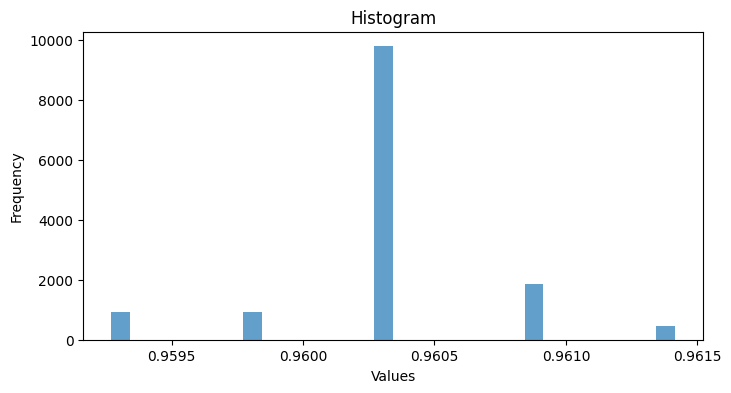

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.hist(group3, bins=30, density=True, alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

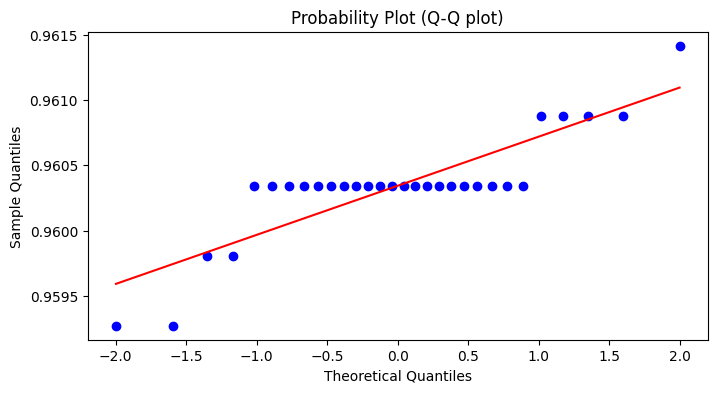

In [ ]:
plt.figure(figsize=(8, 4))
stats.probplot(group3, plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Probability Plot (Q-Q plot)')

plt.show()

In [ ]:
# shapiro 함수 활용
# group1
from scipy import stats

stat, p = stats.shapiro(group1)
print('Statistic : % .3f  p-value : % .3f' %(stat, p))


if p > 0.05:
    print('데이터가 정규분포를 따른다.')
else:
    print('데이터가 정규분포를 따르지 않는다.')

Statistic :  0.915  p-value :  0.020
데이터가 정규분포를 따르지 않는다.


In [ ]:
# group2
stat, p = stats.shapiro(group2)
print('Statistic : % .3f  p-value : % .3f' %(stat, p))


if p > 0.05:
    print('데이터가 정규분포를 따른다.')
else:
    print('데이터가 정규분포를 따르지 않는다.')

Statistic :  0.817  p-value :  0.000
데이터가 정규분포를 따르지 않는다.


In [ ]:
# group3
stat, p = stats.shapiro(group3)
print('Statistic : % .3f  p-value : % .3f' %(stat, p))


if p > 0.05:
    print('데이터가 정규분포를 따른다.')
else:
    print('데이터가 정규분포를 따르지 않는다.')

Statistic :  0.757  p-value :  0.000
데이터가 정규분포를 따르지 않는다.


In [ ]:
# group4
stat, p = stats.shapiro(group4)
print('Statistic : % .3f  p-value : % .3f' %(stat, p))


if p > 0.05:
    print('데이터가 정규분포를 따른다.')
else:
    print('데이터가 정규분포를 따르지 않는다.')

Statistic :  0.940  p-value :  0.090
데이터가 정규분포를 따른다.


In [ ]:
# group5
stat, p = stats.shapiro(group5)
print('Statistic : % .3f  p-value : % .3f' %(stat, p))


if p > 0.05:
    print('데이터가 정규분포를 따른다.')
else:
    print('데이터가 정규분포를 따르지 않는다.')

Statistic :  0.886  p-value :  0.004
데이터가 정규분포를 따르지 않는다.


In [ ]:
# !pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 8.7 MB/s eta 0:00:00


In [ ]:
!pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install hpbandster-sklearn

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from skopt import BayesSearchCV
#from hpbandster_sklearn import HpBandSterSearchCV
#from hpbandster.optimizers import HyperBand
#from hyperopt import fmin, tpe, hp ,Trials, rand

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/경경대 학술제(?)/data/"

In [ ]:
# MNIST 데이터셋 불러오기 및 저장
mnist_train_transform = transforms.Compose([transforms.ToTensor()])
mnist_test_transform = transforms.Compose([transforms.ToTensor()])

trainset_mnist = datasets.MNIST(path + 'data', train=True, download=True,
transform=mnist_train_transform)
testset_mnist = datasets.MNIST(path + 'data', train=False, download=True,
transform=mnist_test_transform)

MNIST_train = DataLoader(trainset_mnist, batch_size=32, shuffle=True, num_workers=2)
MNIST_test = DataLoader(testset_mnist, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
MNIST_train_images = []
MNIST_train_labels = []
for batch in MNIST_train:
  images, labels = batch
  images_flat = images.view(images.shape[0], -1)
  MNIST_train_images.append(images_flat.numpy())
  MNIST_train_labels.append(labels.numpy())
MNIST_train_images = np.vstack(MNIST_train_images)
MNIST_train_labels = np.concatenate(MNIST_train_labels)

In [ ]:
MNIST_test_images = []
MNIST_test_labels = []
for batch in MNIST_test:
  images, labels = batch
  images_flat = images.view(images.shape[0], -1)
  MNIST_test_images.append(images_flat.numpy())
  MNIST_test_labels.append(labels.numpy())
MNIST_test_images = np.vstack(MNIST_test_images)
MNIST_test_labels = np.concatenate(MNIST_test_labels)

In [ ]:
X_train = MNIST_train_images
X_test = MNIST_test_images
y_train = MNIST_train_labels
y_test = MNIST_test_labels

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

KeyboardInterrupt: ignored

In [ ]:
y_pred = lr.predict(X_test)
display(y_pred)

# Binary problem
어떤 숫자를 제일 헷갈려할까

In [ ]:
i_list = []
j_list = []
acc_list = []

for i in range(0,9):
  for j in range(0,9):
    if i == j:
      continue
    X_train_bin = X_train[(y_train == i) | (y_train == j)]
    X_test_bin = X_test[(y_test == i) | (y_test == j)]
    y_train_bin = y_train[(y_train == i) | (y_train == j)]
    y_test_bin = y_test[(y_test == i) | (y_test == j)]

    lr = LogisticRegression()
    lr.fit(X_train_bin, y_train_bin)
    score = lr.score(X_test_bin,y_test_bin)

    i_list.append(i)
    j_list.append(j)
    acc_list.append(score)

bin_df = pd.DataFrame({'i' : i_list, 'j' : j_list,'acc': acc_list})
bin_df.sort_values('acc')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
bin_df = pd.DataFrame({'i' : i_list, 'j' : j_list,'acc': acc_list})
bin_df.sort_values('acc')

,i,j,acc
69,8,5,0.957663
47,5,8,0.957663
28,3,5,0.965825
43,5,3,0.965825
67,8,3,0.966230
...,...,...,...
49,6,1,0.998089
11,1,4,0.999055
33,4,1,0.999055
8,1,0,0.999527


# Binary problem
-class == 5 또는 8인 데이터만 택하자.  

In [ ]:
X_train_bin = X_train[(y_train == 5) | (y_train == 8)]
X_test_bin = X_test[(y_test == 5) | (y_test == 8)]
y_train_bin = y_train[(y_train == 5) | (y_train == 8)]
y_test_bin = y_test[(y_test == 5) | (y_test == 8)]

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_bin, y_train_bin)
lr.score(X_test_bin,y_test_bin)

In [ ]:
y_pred = lr.predict(X_test_bin)
display(y_pred)
display(y_test_bin)

# C값을 그룹화하여 시각화화

In [ ]:
C = [0.0001, 0.001, 0.01,0.1 ,1, 10, 100, 1000]
C_range1 = np.random.uniform(0.0001, 0.001, size=30)
C_range2 = np.random.uniform(0.001, 0.01, size=30)
C_range3 = np.random.uniform(0.01, 0.1, size=30)
C_range4 = np.random.uniform(0.1, 1, size=30)
C_range5 = np.random.uniform(1, 10, size=30)
C_range6 = np.random.uniform(10, 100, size=30)
C_range7 = np.random.uniform(100, 1000, size=30)

In [ ]:
C_total = np.array([C_range1, C_range2, C_range3, C_range4, C_range5, C_range6, C_range7])

In [ ]:
C_list = []
accuracy_list = []
for group in C_total:
  for c in group:
    lr=LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train_bin, y_train_bin)
    C_list.append(c)
    accuracy_list.append(lr.score(X_test_bin, y_test_bin))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
df = pd.read_csv(path + 'C_list.csv')

In [ ]:
group1 = df[0:30]
group2 = df[30:60]
group3 = df[60:90]
group4 = df[90:120]
group5 = df[120:150]
group6 = df[150:180]
group7 = df[180:210]

In [ ]:
gp1_mean = group1['accuracy'].mean()
gp2_mean = group2['accuracy'].mean()
gp3_mean = group3['accuracy'].mean()
gp4_mean = group4['accuracy'].mean()
gp5_mean = group5['accuracy'].mean()
gp6_mean = group6['accuracy'].mean()
gp7_mean = group7['accuracy'].mean()

In [ ]:
c_list = ['(-0.0001, 0.001]','(0.001, 0.01]','(0.01,0.1]','(0.1,1]','(1,10]','(10,100]','(100,1000]']
ac_list = [gp1_mean, gp2_mean, gp3_mean, gp4_mean, gp5_mean, gp6_mean, gp7_mean]

NameError: ignored

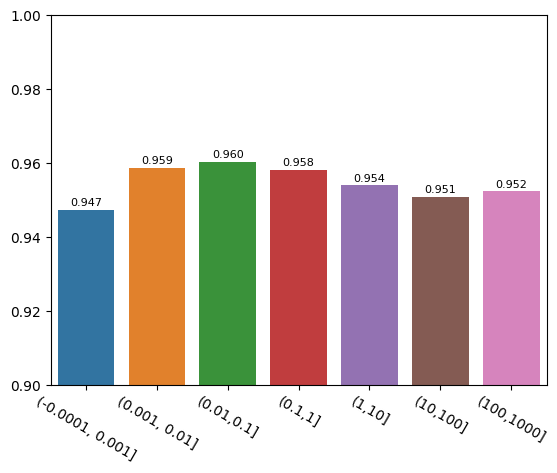

In [ ]:
ax = sns.barplot(x=c_list, y=ac_list)
plt.ylim(0.9,1)
plt.xticks(rotation=-30)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2, p.get_height()+0.001), ha='center', fontsize=8)
plt.show()

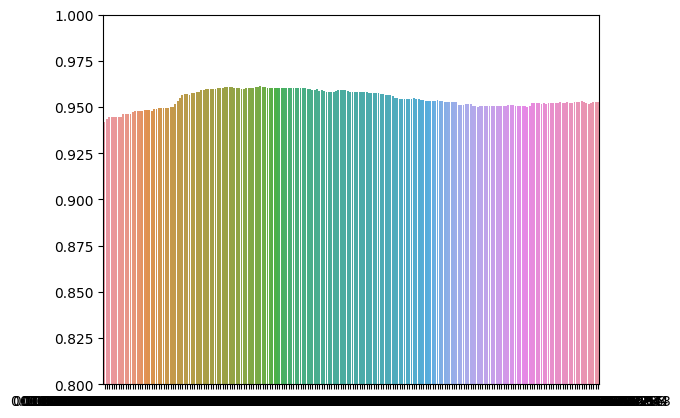

In [ ]:
sns.barplot(x=C_list, y=accuracy_list)
plt.ylim(0.8,1)
plt.show()

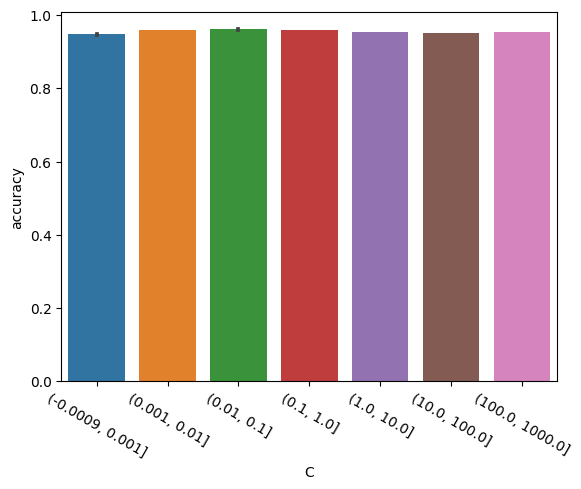

In [ ]:
x_bins = [0.0001, 0.001, 0.01, 0.1 ,1, 10, 100, 1000]

sns.barplot(x=pd.cut(df['C'], bins=x_bins, include_lowest=True), y=df['accuracy'])
plt.xticks(rotation=-30)
plt.show()

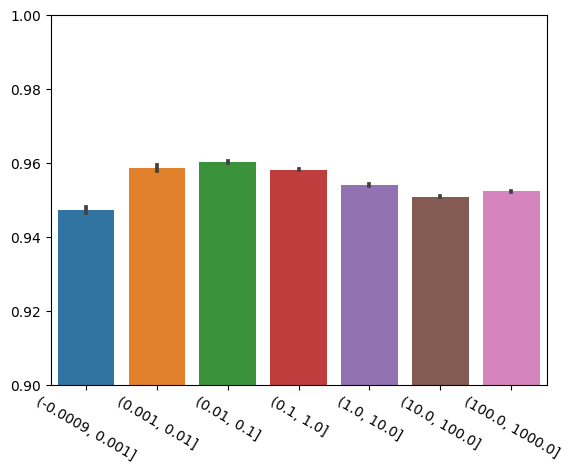

In [ ]:
x_bins = [0.0001, 0.001, 0.01,0.1 ,1, 10, 100, 1000]

sns.barplot(x=pd.cut(C_list, bins=x_bins, include_lowest=True), y=accuracy_list)
plt.ylim(0.9,1)
plt.xticks(rotation=-30)
plt.show()

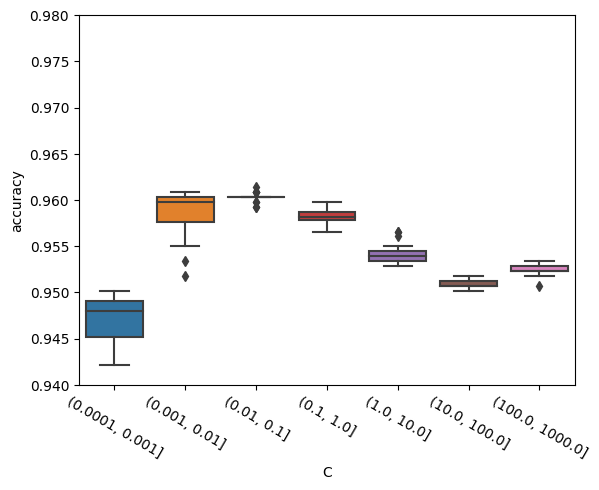

In [ ]:
x_bins = [0.0001, 0.001, 0.01,0.1 ,1, 10, 100, 1000]

sns.boxplot(x=pd.cut(df['C'], bins=x_bins), y=df['accuracy'])
plt.ylim(0.94,0.98)
plt.xticks(rotation=-30)
plt.show()

In [ ]:
#리스트 결과값 저장 / 혹시모르니
import csv

# 데이터 저장할 파일 경로 지정
filename = "/content/drive/MyDrive/Colab Notebooks/경경대 학술제(?)/data/C_list.csv"

# 데이터 리스트들을 zip 함수를 사용하여 하나로 합치기
data = zip(C_list, accuracy_list)

# 파일을 쓰기 모드로 열고 데이터 쓰기
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    # 각 열의 제목을 쓰기
    writer.writerow(['C','accuracy'])
    # 데이터 쓰기
    for row in data:
        writer.writerow(row)

NameError: ignored

In [ ]:
df

,C,accuracy
0,0.000614,0.948017
1,0.000682,0.948553
2,0.000484,0.946409
3,0.000804,0.949089
4,0.000832,0.949625
...,...,...
205,534.316165,0.952304
206,353.108606,0.951768
207,507.667573,0.952304
208,781.982964,0.952304


In [ ]:
### 크루스칼 왈리스 검정
sub_arrays = np.array_split(df['accuracy'], 7)
len(sub_arrays)

7

In [ ]:
# Kruskal-Wallis 검정 실행
import numpy as np
from scipy.stats import kruskal

stat, p_val = kruskal(sub_arrays[0], sub_arrays[1], sub_arrays[2], sub_arrays[3], sub_arrays[4], sub_arrays[5], sub_arrays[6])

print("Kruskal-Wallis test result")
print("Test statistic: ", stat)
print("p-value: ", p_val)

Kruskal-Wallis test result
Test statistic:  190.5766845896926
p-value:  1.918505353766126e-38


In [ ]:
# Dunn의 검정 수행
import scikit_posthocs as sp

p_values = sp.posthoc_dunn(sub_arrays)
p_values < 0.05

,1,2,3,4,5,6,7
1,False,True,True,True,True,True,True
2,True,False,False,False,True,True,True
3,True,False,False,True,True,True,True
4,True,False,True,False,True,True,True
5,True,True,True,True,False,True,False
6,True,True,True,True,True,False,False
7,True,True,True,True,False,False,False


In [ ]:
df

,C,accuracy
0,0.000614,0.948017
1,0.000682,0.948553
2,0.000484,0.946409
3,0.000804,0.949089
4,0.000832,0.949625
...,...,...
205,534.316165,0.952304
206,353.108606,0.951768
207,507.667573,0.952304
208,781.982964,0.952304


In [ ]:
group_labels = ['group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7']
df['group'] = [group_labels[i // 30] for i in range(len(df))]

print(df)

              C  accuracy   group
0      0.000614  0.948017  group1
1      0.000682  0.948553  group1
2      0.000484  0.946409  group1
3      0.000804  0.949089  group1
4      0.000832  0.949625  group1
..          ...       ...     ...
205  534.316165  0.952304  group7
206  353.108606  0.951768  group7
207  507.667573  0.952304  group7
208  781.982964  0.952304  group7
209  611.317548  0.952840  group7

[210 rows x 3 columns]


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f896842bcd0>)

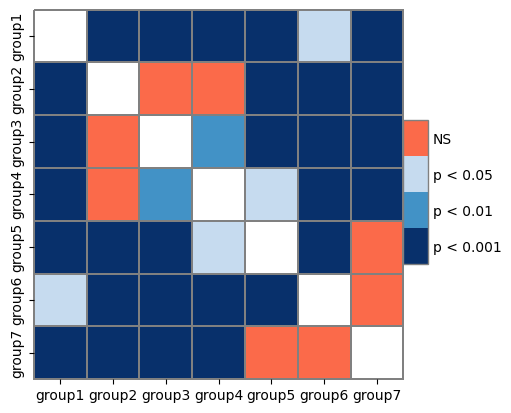

In [ ]:
pc = sp.posthoc_dunn(df, val_col='accuracy', group_col='group')
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on':
False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc,**heatmap_args)

In [ ]:

# 제일 최근거거
accuracy_matrix = np.array([sub_arrays[0],
                            sub_arrays[1],
                            sub_arrays[2],
                            sub_arrays[3],
                            sub_arrays[4],
                            sub_arrays[5],
                            sub_arrays[6]])

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(df['accuracy'], np.concatenate([[i]*30 for i in range(7)]))
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0114,0.0,0.0104,0.0124,True
0,2,0.013,0.0,0.012,0.014,True
0,3,0.011,0.0,0.0099,0.012,True
0,4,0.0067,0.0,0.0057,0.0077,True
0,5,0.0035,0.0,0.0025,0.0046,True
0,6,0.0051,0.0,0.004,0.0061,True
1,2,0.0016,0.0001,0.0006,0.0026,True
1,3,-0.0004,0.8464,-0.0015,0.0006,False
1,4,-0.0047,0.0,-0.0057,-0.0036,True
1,5,-0.0079,0.0,-0.0089,-0.0068,True


In [ ]:
accuracy_matrix = np.array([sub_arrays[0],
                            sub_arrays[1],
                            sub_arrays[2],
                            sub_arrays[3],
                            sub_arrays[4],
                            sub_arrays[5],
                            sub_arrays[6]])
accuracy_matrix.shape

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(accuracy_list, np.concatenate([[i]*30 for i in range(7)]))
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0126,0.0,0.0113,0.0139,True
0,2,0.014,0.0,0.0127,0.0153,True
0,3,0.0121,0.0,0.0108,0.0134,True
0,4,0.0073,0.0,0.006,0.0086,True
0,5,0.0045,0.0,0.0032,0.0058,True
0,6,0.0058,0.0,0.0045,0.0072,True
1,2,0.0014,0.0335,0.0001,0.0027,True
1,3,-0.0005,0.903,-0.0018,0.0008,False
1,4,-0.0053,0.0,-0.0066,-0.004,True
1,5,-0.0081,0.0,-0.0094,-0.0068,True


In [ ]:
accuracy_matrix = np.array([sub_arrays[0],
                            sub_arrays[1],
                            sub_arrays[2],
                            sub_arrays[3],
                            sub_arrays[4],
                            sub_arrays[5],
                            sub_arrays[6]])
accuracy_matrix.shape

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(accuracy_list, np.concatenate([[i]*30 for i in range(7)]))
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0114,0.0,0.0104,0.0124,True
0,2,0.013,0.0,0.012,0.014,True
0,3,0.011,0.0,0.0099,0.012,True
0,4,0.0067,0.0,0.0057,0.0077,True
0,5,0.0035,0.0,0.0025,0.0046,True
0,6,0.0051,0.0,0.004,0.0061,True
1,2,0.0016,0.0001,0.0006,0.0026,True
1,3,-0.0004,0.8464,-0.0015,0.0006,False
1,4,-0.0047,0.0,-0.0057,-0.0036,True
1,5,-0.0079,0.0,-0.0089,-0.0068,True


# C값 + solver 그룹 간 검정

In [ ]:
C = [0.0001, 0.001, 0.01,0.1 ,1, 10, 100, 1000]

#0.0001 ~ 0.001
C_group1 = np.random.uniform(0.0001, 0.001, size=10)
C_group2 = np.random.uniform(0.001, 0.01, size=10)
C_group3 = np.random.uniform(0.01, 0.1, size=10)
C_group4 = np.random.uniform(0.1, 1, size=10)
C_group5 = np.random.uniform(1, 10, size=10)
C_group6 = np.random.uniform(10, 100, size=10)
C_group7 = np.random.uniform(100, 1000, size=10)

sol = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [ ]:
C_total = np.array([C_group1, C_group2, C_group3, C_group4, C_group5, C_group6, C_group7])

In [ ]:
sol_list = []
C_list = []
accuracy_list = []
for s in sol:
  for group in C_total:
    for c in group:
      lr=LogisticRegression(C=c, solver = s,max_iter=1000)
      lr.fit(X_train_bin, y_train_bin)
      C_list.append(c)
      sol_list.append(s)
      accuracy_list.append(lr.score(X_test_bin, y_test_bin))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Se

In [ ]:
#리스트 결과값 저장 / 혹시모르니
import csv

# 데이터 저장할 파일 경로 지정
filename = "/content/drive/MyDrive/Colab Notebooks/경경대 학술제(?)/data/C_sol_list.csv"

# 데이터 리스트들을 zip 함수를 사용하여 하나로 합치기
data = zip(C_list, sol_list, accuracy_list)

# 파일을 쓰기 모드로 열고 데이터 쓰기
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    # 각 열의 제목을 쓰기
    writer.writerow(['C', 'solver', 'accuracy'])
    # 데이터 쓰기
    for row in data:
        writer.writerow(row)


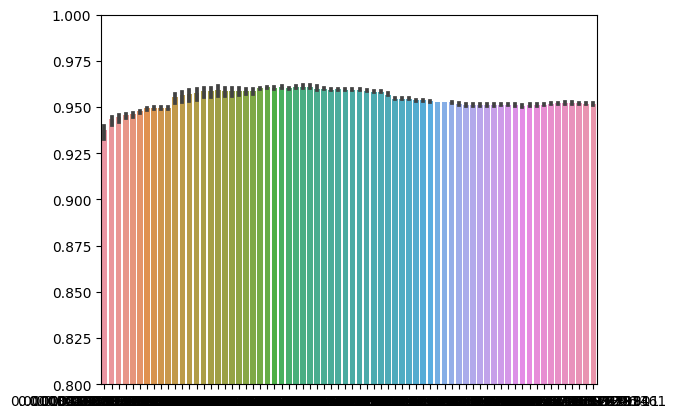

In [ ]:
sns.barplot(x=C_list, y=accuracy_list)
plt.ylim(0.8,1)
plt.show()

# 시각화 예시코드

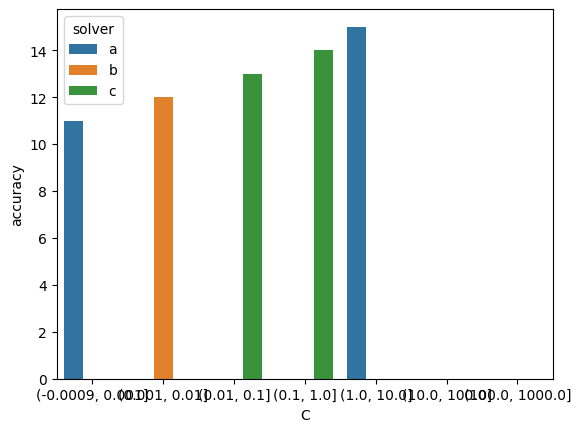

In [ ]:
# 예시 코드

# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# df = pd.DataFrame({'solver': ['a','b','c','c','a'], 'C': [0.0002,0.003,0.08,0.4,5], 'accuracy': [11,12,13,14,15]})

# x_bins = [0.0001, 0.001, 0.01,0.1 ,1, 10, 100, 1000]

# sns.barplot(x=pd.cut(df['C'], bins=x_bins, include_lowest=True), y=df['accuracy'], hue=df['solver']);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


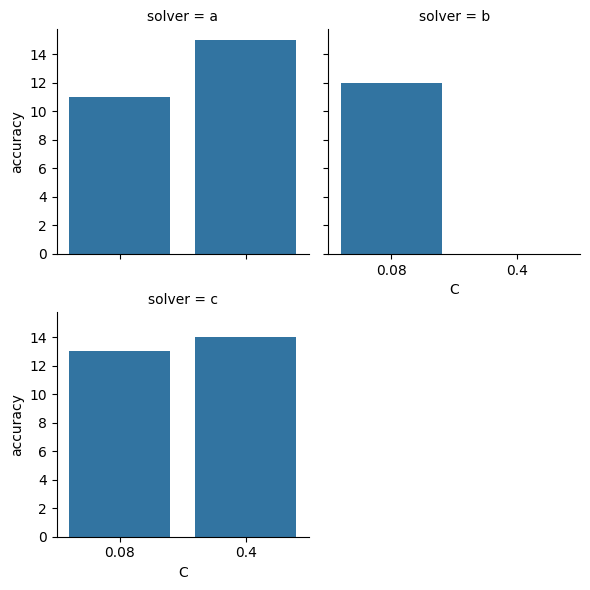

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# df = pd.DataFrame({'solver': ['a','b','c','c','a'], 'C': [0.0002,0.003,0.08,0.4,5], 'accuracy': [11,12,13,14,15]})

# x_bins = [0.0001, 0.001, 0.01,0.1 ,1, 10, 100, 1000]

# g = sns.FacetGrid(df, col="solver", col_wrap=2)
# g.map(sns.barplot, "C", "accuracy")

# plt.show()

# 여기서부터 돌리면 됨

In [ ]:
df

,C,solver,accuracy
0,0.000876,newton-cg,0.950161
1,0.000109,newton-cg,0.939979
2,0.000708,newton-cg,0.948017
3,0.000950,newton-cg,0.950161
4,0.000499,newton-cg,0.946409
...,...,...,...
345,267.154655,saga,0.951768
346,802.373870,saga,0.951768
347,467.494343,saga,0.951768
348,154.098320,saga,0.951768


In [ ]:
## solver에 따른 C 그룹별 accuracy 출력 > 5개의 figure

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(path + 'C_sol_list.csv')
df_newton = df[df['solver']=='newton-cg']
df_lbfgs = df[df['solver']=='lbfgs']
df_liblinear = df[df['solver']=='liblinear']
df_sag = df[df['solver']=='sag']
df_saga = df[df['solver']=='saga']

In [ ]:
group_labels = ['group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7']
df_newton['group'] = [group_labels[i // 10] for i in range(len(df_newton))]
df_lbfgs['group'] = [group_labels[i // 10] for i in range(len(df_lbfgs))]
df_liblinear['group'] = [group_labels[i // 10] for i in range(len(df_liblinear))]
df_sag['group'] = [group_labels[i // 10] for i in range(len(df_sag))]
df_saga['group'] = [group_labels[i // 10] for i in range(len(df_saga))]


<ipython-input-95-a993dfcbbb5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newton['group'] = [group_labels[i // 10] for i in range(len(df_newton))]
<ipython-input-95-a993dfcbbb5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lbfgs['group'] = [group_labels[i // 10] for i in range(len(df_lbfgs))]
<ipython-input-95-a993dfcbbb5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f895ddaacb0>)

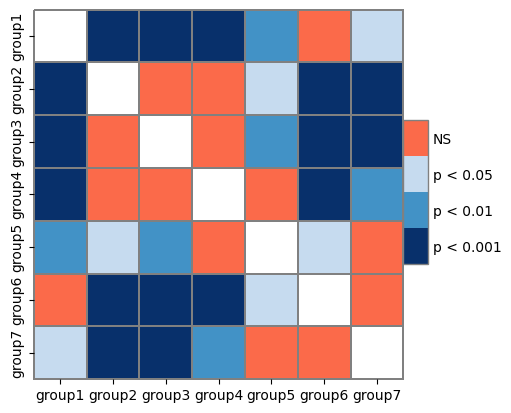

In [ ]:
#df_newton dunn test
pc = sp.posthoc_dunn(df_newton, val_col='accuracy', group_col='group')
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on':
False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc,**heatmap_args)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f8964e5c610>)

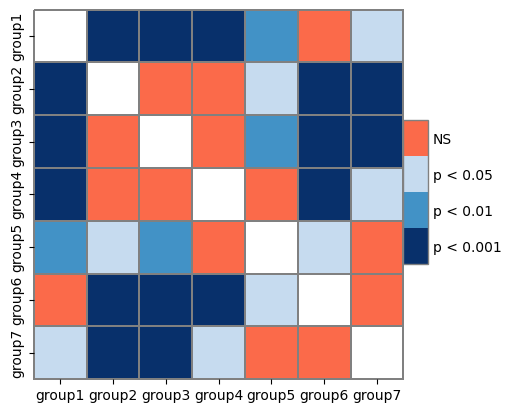

In [ ]:
#df_lbfgs dunn test
pc = sp.posthoc_dunn(df_lbfgs, val_col='accuracy', group_col='group')
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on':
False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc,**heatmap_args)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f896864aa10>)

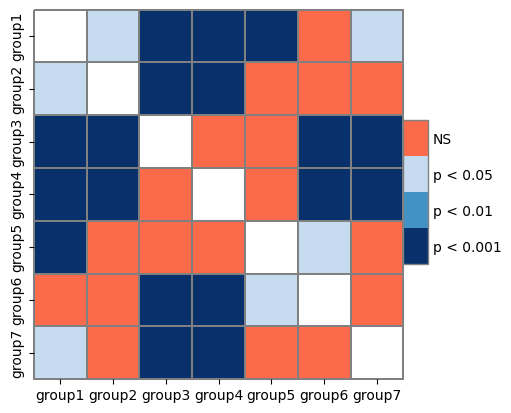

In [ ]:
#df_liblinear dunn test
pc = sp.posthoc_dunn(df_liblinear, val_col='accuracy', group_col='group')
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on':
False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc,**heatmap_args)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f896886cf40>)

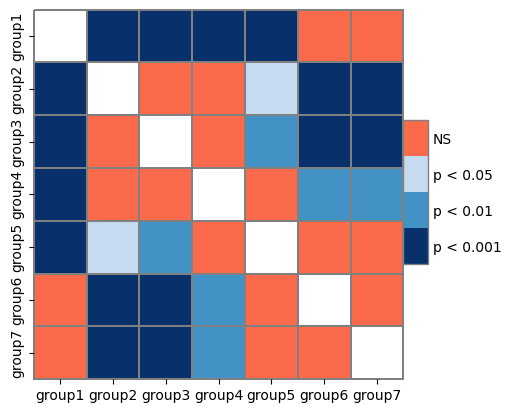

In [ ]:
#df_sag dunn test
pc = sp.posthoc_dunn(df_sag, val_col='accuracy', group_col='group')
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on':
False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc,**heatmap_args)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f8964d31810>)

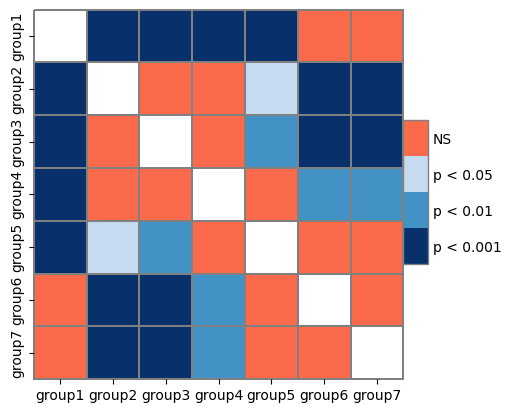

In [ ]:
#df_saga dunn test
pc = sp.posthoc_dunn(df_saga, val_col='accuracy', group_col='group')
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on':
False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc,**heatmap_args)

In [ ]:
x_bins = [0.0001, 0.001, 0.01, 0.1 ,1, 10, 100, 1000]

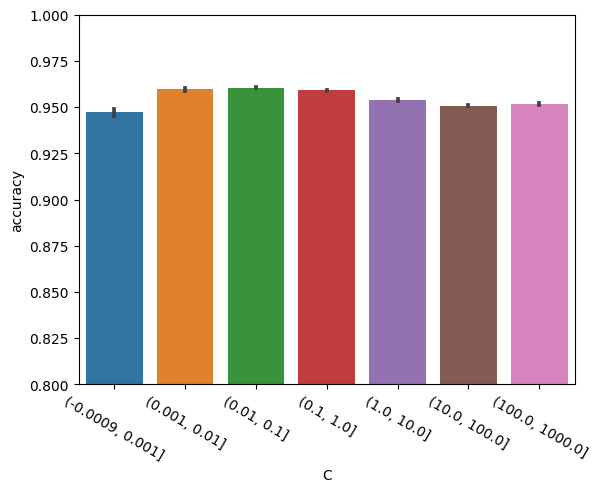

In [ ]:
# 1. df_newton
sns.barplot(x=pd.cut(df_newton['C'], bins=x_bins, include_lowest=True), y=df_newton['accuracy'])
plt.ylim(0.8,1)
plt.xticks(rotation=-30)
plt.show()

In [ ]:
# Kruskal-Wallis 검정 실행
sub_arrays = np.array_split(df_newton['accuracy'], 7)
stat, p_val = kruskal(sub_arrays[0], sub_arrays[1], sub_arrays[2], sub_arrays[3], sub_arrays[4], sub_arrays[5], sub_arrays[6])

print("Kruskal-Wallis test result")
print("Test statistic: ", stat)
print("p-value: ", p_val)

Kruskal-Wallis test result
Test statistic:  64.65571305312459
p-value:  5.071843996319476e-12


In [ ]:
accuracy_matrix = np.array([sub_arrays[0],
                            sub_arrays[1],
                            sub_arrays[2],
                            sub_arrays[3],
                            sub_arrays[4],
                            sub_arrays[5],
                            sub_arrays[6]])
accuracy_matrix.shape

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(accuracy_list, np.concatenate([[i]*30 for i in range(7)]))
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0114,0.0,0.0104,0.0124,True
0,2,0.013,0.0,0.012,0.014,True
0,3,0.011,0.0,0.0099,0.012,True
0,4,0.0067,0.0,0.0057,0.0077,True
0,5,0.0035,0.0,0.0025,0.0046,True
0,6,0.0051,0.0,0.004,0.0061,True
1,2,0.0016,0.0001,0.0006,0.0026,True
1,3,-0.0004,0.8464,-0.0015,0.0006,False
1,4,-0.0047,0.0,-0.0057,-0.0036,True
1,5,-0.0079,0.0,-0.0089,-0.0068,True


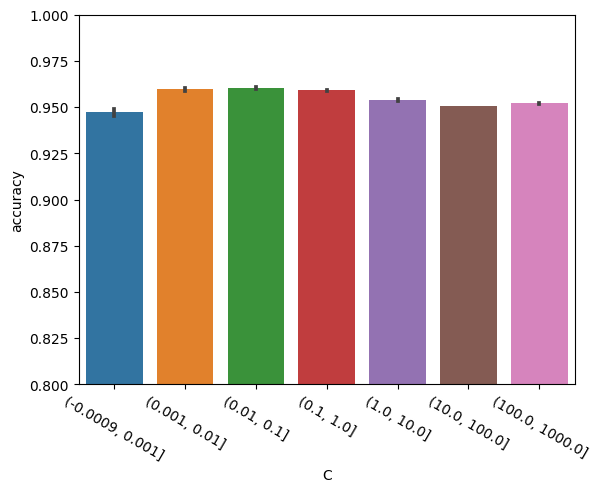

In [ ]:
# 2. df_lbfgs
sns.barplot(x=pd.cut(df_lbfgs['C'], bins=x_bins, include_lowest=True), y=df_lbfgs['accuracy'])
plt.ylim(0.8,1)
plt.xticks(rotation=-30)
plt.show()

In [ ]:
# Kruskal-Wallis 검정 실행
sub_arrays = np.array_split(df_lbfgs['accuracy'], 7)
stat, p_val = kruskal(sub_arrays[0], sub_arrays[1], sub_arrays[2], sub_arrays[3], sub_arrays[4], sub_arrays[5], sub_arrays[6])

print("Kruskal-Wallis test result")
print("Test statistic: ", stat)
print("p-value: ", p_val)

Kruskal-Wallis test result
Test statistic:  64.65268540848834
p-value:  5.079066660929739e-12


In [ ]:
accuracy_matrix = np.array([sub_arrays[0],
                            sub_arrays[1],
                            sub_arrays[2],
                            sub_arrays[3],
                            sub_arrays[4],
                            sub_arrays[5],
                            sub_arrays[6]])
accuracy_matrix.shape

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(accuracy_list, np.concatenate([[i]*30 for i in range(7)]))
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0114,0.0,0.0104,0.0124,True
0,2,0.013,0.0,0.012,0.014,True
0,3,0.011,0.0,0.0099,0.012,True
0,4,0.0067,0.0,0.0057,0.0077,True
0,5,0.0035,0.0,0.0025,0.0046,True
0,6,0.0051,0.0,0.004,0.0061,True
1,2,0.0016,0.0001,0.0006,0.0026,True
1,3,-0.0004,0.8464,-0.0015,0.0006,False
1,4,-0.0047,0.0,-0.0057,-0.0036,True
1,5,-0.0079,0.0,-0.0089,-0.0068,True


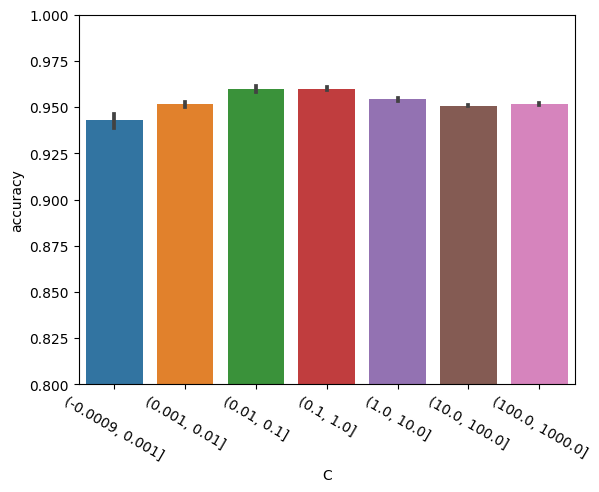

In [ ]:
# 3. df_liblinear
sns.barplot(x=pd.cut(df_liblinear['C'], bins=x_bins, include_lowest=True), y=df_liblinear['accuracy'])
plt.ylim(0.8,1)
plt.xticks(rotation=-30)
plt.show()

In [ ]:
# Kruskal-Wallis 검정 실행
sub_arrays = np.array_split(df_liblinear['accuracy'], 7)
stat, p_val = kruskal(sub_arrays[0], sub_arrays[1], sub_arrays[2], sub_arrays[3], sub_arrays[4], sub_arrays[5], sub_arrays[6])

print("Kruskal-Wallis test result")
print("Test statistic: ", stat)
print("p-value: ", p_val)

Kruskal-Wallis test result
Test statistic:  61.07756652654905
p-value:  2.718136170421094e-11


In [ ]:
accuracy_matrix = np.array([sub_arrays[0],
                            sub_arrays[1],
                            sub_arrays[2],
                            sub_arrays[3],
                            sub_arrays[4],
                            sub_arrays[5],
                            sub_arrays[6]])
accuracy_matrix.shape

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(accuracy_list, np.concatenate([[i]*30 for i in range(7)]))
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0114,0.0,0.0104,0.0124,True
0,2,0.013,0.0,0.012,0.014,True
0,3,0.011,0.0,0.0099,0.012,True
0,4,0.0067,0.0,0.0057,0.0077,True
0,5,0.0035,0.0,0.0025,0.0046,True
0,6,0.0051,0.0,0.004,0.0061,True
1,2,0.0016,0.0001,0.0006,0.0026,True
1,3,-0.0004,0.8464,-0.0015,0.0006,False
1,4,-0.0047,0.0,-0.0057,-0.0036,True
1,5,-0.0079,0.0,-0.0089,-0.0068,True


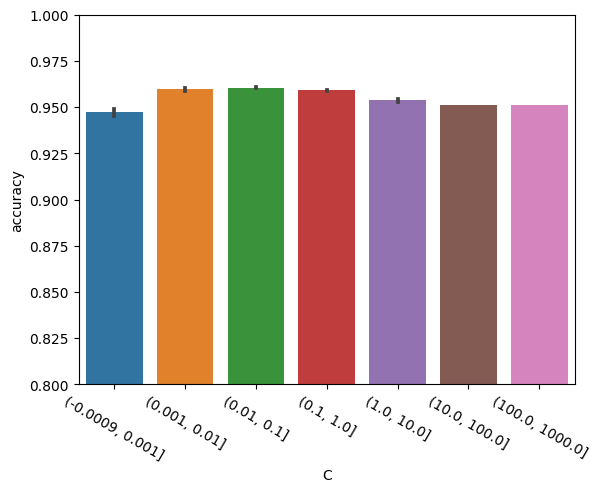

In [ ]:
# 4. df_sag
sns.barplot(x=pd.cut(df_sag['C'], bins=x_bins, include_lowest=True), y=df_sag['accuracy'])
plt.ylim(0.8,1)
plt.xticks(rotation=-30)
plt.show()

In [ ]:
# Kruskal-Wallis 검정 실행
sub_arrays = np.array_split(df_sag['accuracy'], 7)
stat, p_val = kruskal(sub_arrays[0], sub_arrays[1], sub_arrays[2], sub_arrays[3], sub_arrays[4], sub_arrays[5], sub_arrays[6])

print("Kruskal-Wallis test result")
print("Test statistic: ", stat)
print("p-value: ", p_val)

Kruskal-Wallis test result
Test statistic:  65.80114039032284
p-value:  2.959549805087609e-12


In [ ]:
accuracy_matrix = np.array([sub_arrays[0],
                            sub_arrays[1],
                            sub_arrays[2],
                            sub_arrays[3],
                            sub_arrays[4],
                            sub_arrays[5],
                            sub_arrays[6]])
accuracy_matrix.shape

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(accuracy_list, np.concatenate([[i]*30 for i in range(7)]))
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0114,0.0,0.0104,0.0124,True
0,2,0.013,0.0,0.012,0.014,True
0,3,0.011,0.0,0.0099,0.012,True
0,4,0.0067,0.0,0.0057,0.0077,True
0,5,0.0035,0.0,0.0025,0.0046,True
0,6,0.0051,0.0,0.004,0.0061,True
1,2,0.0016,0.0001,0.0006,0.0026,True
1,3,-0.0004,0.8464,-0.0015,0.0006,False
1,4,-0.0047,0.0,-0.0057,-0.0036,True
1,5,-0.0079,0.0,-0.0089,-0.0068,True


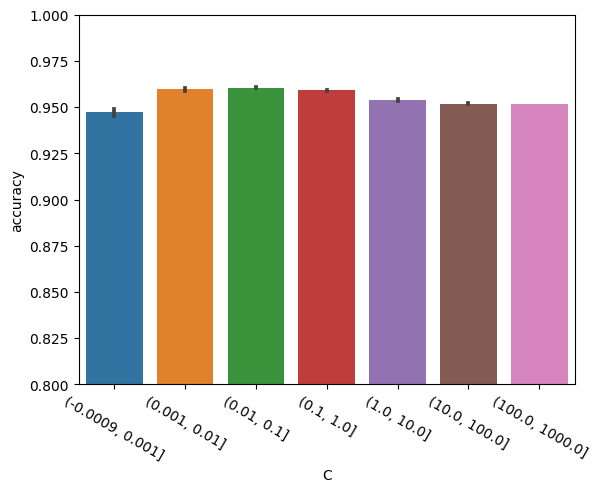

In [ ]:
# 5. df_saga
sns.barplot(x=pd.cut(df_saga['C'], bins=x_bins, include_lowest=True), y=df_saga['accuracy'])
plt.ylim(0.8,1)
plt.xticks(rotation=-30)
plt.show()

In [ ]:
# Kruskal-Wallis 검정 실행
sub_arrays = np.array_split(df_saga['accuracy'], 7)
stat, p_val = kruskal(sub_arrays[0], sub_arrays[1], sub_arrays[2], sub_arrays[3], sub_arrays[4], sub_arrays[5], sub_arrays[6])

print("Kruskal-Wallis test result")
print("Test statistic: ", stat)
print("p-value: ", p_val)

Kruskal-Wallis test result
Test statistic:  65.47452119647087
p-value:  3.451114747634942e-12


In [ ]:
accuracy_matrix = np.array([sub_arrays[0],
                            sub_arrays[1],
                            sub_arrays[2],
                            sub_arrays[3],
                            sub_arrays[4],
                            sub_arrays[5],
                            sub_arrays[6]])
accuracy_matrix.shape

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(accuracy_list, np.concatenate([[i]*30 for i in range(7)]))
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0114,0.0,0.0104,0.0124,True
0,2,0.013,0.0,0.012,0.014,True
0,3,0.011,0.0,0.0099,0.012,True
0,4,0.0067,0.0,0.0057,0.0077,True
0,5,0.0035,0.0,0.0025,0.0046,True
0,6,0.0051,0.0,0.004,0.0061,True
1,2,0.0016,0.0001,0.0006,0.0026,True
1,3,-0.0004,0.8464,-0.0015,0.0006,False
1,4,-0.0047,0.0,-0.0057,-0.0036,True
1,5,-0.0079,0.0,-0.0089,-0.0068,True


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


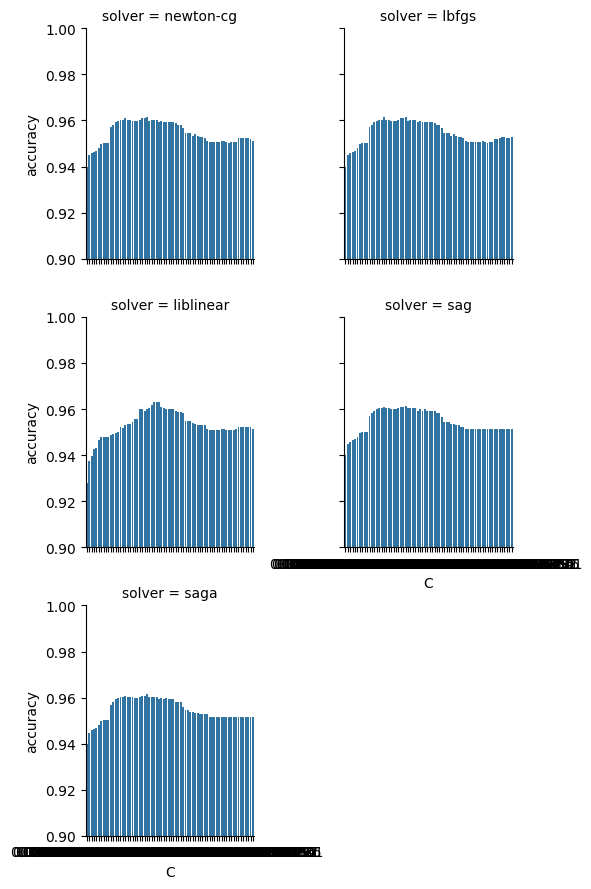

In [ ]:
# solver에 따른 C 각각에 대한 accuracy 출력 (5개의 figure)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# df = pd.DataFrame({'solver': ['a','b','c','c','a'], 'C': [0.0002,0.003,0.08,0.4,5], 'accuracy': [11,12,13,14,15]})

x_bins = [0.0001, 0.001, 0.01,0.1 ,1, 10, 100, 1000]

g = sns.FacetGrid(df, col="solver", col_wrap=2)
g.map(sns.barplot, "C", "accuracy")
plt.ylim(0.9,1)

plt.show()

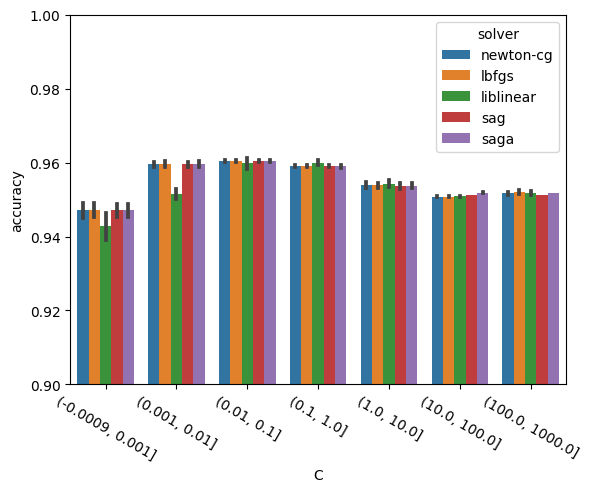

In [ ]:
# 하나의 figure에 hue='solver'로 그룹지어 C그룹 별 accuracy 출력

x_bins = [0.0001, 0.001, 0.01,0.1 ,1, 10, 100, 1000]
sns.barplot(x=pd.cut(df['C'], bins=x_bins, include_lowest=True), y=df['accuracy'], hue=df['solver'])
plt.ylim(0.9,1)
plt.xticks(rotation=-30)
plt.show()

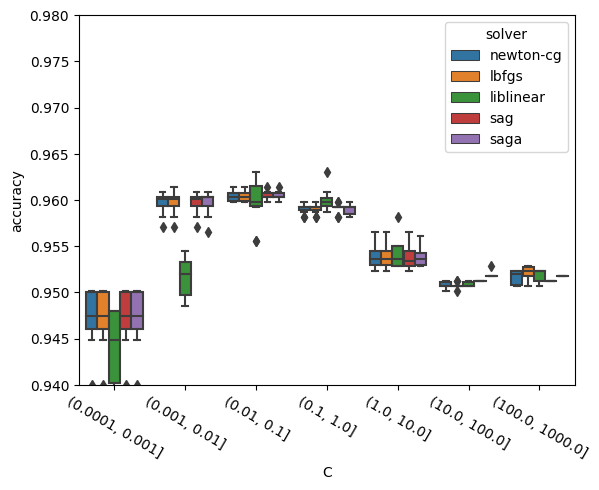

In [ ]:
x_bins = [0.0001, 0.001, 0.01,0.1 ,1, 10, 100, 1000]

sns.boxplot(x=pd.cut(df['C'], bins=x_bins), y=df['accuracy'],hue=df['solver'])
plt.ylim(0.94,0.98)
plt.xticks(rotation=-30)
plt.show()

# 여기까지

In [ ]:
# 그룹간 비모수검정



In [ ]:
# from sklearn.datasets import fetch_openml
# from sklearn.model_selection import train_test_split

# # MNIST 데이터셋 로드
# mnist = fetch_openml('mnist_784', version=1)

# # 0과 1만 선택하여 X, y 생성
# X = mnist.data[(mnist.target == '0') | (mnist.target == '1')]
# y = mnist.target[(mnist.target == '0') | (mnist.target == '1')]

# # train/test set 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# from sklearn.linear_model import LogisticRegression

# # 로지스틱 회귀 모델 생성
# log_reg = LogisticRegression()

# # 모델 적합
# log_reg.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred = log_reg.predict(X_test)
# acc =  accuracy_score(y_pred, y_test)
# print(acc)

# GridSearchCV

In [ ]:
#param 설정
param = {'C':[0.001, 0.01,0.1,1,10,100]}

#lr 정의 및 그리드서치 객체 설정
lr = LogisticRegression()
gs_lr = GridSearchCV(lr, param_grid = param, cv=3)
gs_lr.fit(X_train_bin, y_train_bin)

#그리드 서치 결과
df_grid = pd.DataFrame(gs_lr.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

In [ ]:
param = {'C':[0.001, 0.01,0.1,1,10,100]}

In [ ]:
lr = LogisticRegression()

In [ ]:
gs_lr = GridSearchCV(lr, param_grid = param, cv=3)

In [ ]:
gs_lr.fit(X_train_bin, y_train_bin)

print("Best Parameter: ", gs_lr.best_params_)
print("Training Accuracy: ", gs_lr.best_score_)
print("Test Accuracy: ", gs_lr.score(X_test_bin, y_test_bin))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameter:  {'C': 0.1}
Training Accuracy:  0.9625626038538009
Test Accuracy:  0.9592711682743837


In [ ]:
df_grid = pd.DataFrame(gs_lr.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

,params,mean_test_score,rank_test_score
2,{'C': 0.1},0.962563,1
3,{'C': 1},0.962119,2
1,{'C': 0.01},0.956441,3
4,{'C': 10},0.955376,4
5,{'C': 100},0.951029,5
0,{'C': 0.001},0.945795,6


# RandomizedSearchCV

In [ ]:
from scipy.stats import uniform
param_dist = {'C': uniform(0.001, 100)}

In [ ]:
rs_lr = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=50, cv=3)
rs_lr.fit(X_train_bin,y_train_bin)

print('Best parameter: ', rs_lr.best_params_)
print('Training Accuracy :', rs_lr.best_score_)
print('Test Accuracy :', rs_lr.score(X_test_bin, y_test_bin))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameter:  {'C': 0.9250698094687305}
Training Accuracy : 0.9598121115907393
Test Accuracy : 0.9571275455519829


In [ ]:
df_grid = pd.DataFrame(rs_lr.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

,params,mean_test_score,rank_test_score
9,{'C': 3.406652276660298},0.958304,1
24,{'C': 5.556829445121763},0.957417,2
15,{'C': 6.868194131214372},0.957151,3
11,{'C': 7.740318488931346},0.956973,4
14,{'C': 17.181479034972195},0.954223,5
3,{'C': 25.14851026884573},0.954223,6
0,{'C': 21.646046868020267},0.953514,7
26,{'C': 30.030673550415237},0.952981,8
21,{'C': 48.15008128423667},0.952715,9
28,{'C': 32.39102185914006},0.952626,10


# BayesSearchCV - TPE

In [ ]:
space = {'C':(1e-3,1e+3,'log-uniform')}

In [ ]:
bs_lr = BayesSearchCV(lr, space, cv=3, n_iter=100 ,n_jobs=-1)
bs_lr.fit(X_train_bin, y_train_bin)

print('Best parameter: ', bs_lr.best_params_)
print('Training Accuracy :', bs_lr.best_score_)
print('Test Accuracy :', bs_lr.score(X_test_bin, y_test_bin))

Best parameter:  OrderedDict([('C', 0.18352312810401936)])
Training Accuracy : 0.9631836431494278
Test Accuracy : 0.9598070739549839


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df_grid = pd.DataFrame(bs_lr.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

,params,mean_test_score,rank_test_score
27,{'C': 0.18400116404037414},0.963184,1
25,{'C': 0.18769076840319768},0.963184,1
5,{'C': 0.18352312810401936},0.963184,1
15,{'C': 0.18484729909790995},0.963184,1
26,{'C': 0.18952297736747112},0.963095,5
20,{'C': 0.1652459475514023},0.963095,6
19,{'C': 0.16079158782417557},0.963095,6
0,{'C': 0.12279134283026641},0.963006,8
22,{'C': 0.14259872179960753},0.962917,9
24,{'C': 0.2057934061144408},0.962829,10


# BO-RF

In [ ]:
space = {'C':hp.uniform('C',0.001,100)}

In [ ]:
def objective(params):
  lr = LogisticRegression(C=params['C'])
    # Train the model on the training data
  lr.fit(X_train_bin, y_train_bin)
    # Evaluate the model on the test data
  score = lr.score(X_test_bin, y_test_bin)
    # Store the C value and score in the trials object
  return -score

In [ ]:
trials = Trials()
#rand.suggest - rf
best = fmin(fn=objective, space=space, algo=rand.suggest, max_evals=100, trials=trials)

In [ ]:
val_df = pd.DataFrame(trials.vals)
score_df = pd.DataFrame(trials.results)
trial_df = pd.concat([val_df,score_df * -1],axis=1)
trial_df.drop('status',axis=1,inplace=True)
trial_df.sort_values('loss',ascending=False).head(20)

,C,loss
9,86.902518,0.953912
23,18.871082,0.953912
17,91.726830,0.953912
6,17.363829,0.953912
2,14.439178,0.953376
4,27.757956,0.953376
7,33.958534,0.953376
25,94.400384,0.953376
14,6.475300,0.953376
19,68.674341,0.952840


# BO-HB

In [ ]:
space = {'C':hp.uniform('C',0.001,100)}

In [ ]:
def objective(params):
  lr = LogisticRegression(C=params['C'])
    # Train the model on the training data
  lr.fit(X_train_bin, y_train_bin)
    # Evaluate the model on the test data
  score = lr.score(X_test_bin, y_test_bin)
    # Store the C value and score in the trials object
  return -score

In [ ]:
trials = Trials()
#rand.suggest - HB
best = fmin(fn=objective, space=space, algo=HyperBand, max_evals=30, trials=trials)

  0%|          | 0/30 [00:00<?, ?trial/s, best loss=?]


TypeError: ignored

In [ ]:
val_df = pd.DataFrame(trials.vals)
score_df = pd.DataFrame(trials.results)
trial_df = pd.concat([val_df,score_df * -1],axis=1)
trial_df.drop('status',axis=1,inplace=True)
trial_df.sort_values('loss',ascending=False).head(20)

In [ ]:
df_grid = pd.DataFrame(bohb_lr.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

# C + solver 최적 조합 확인

In [ ]:
# GridSearchCV
param = {'C':[0.01,0.1,1,10],
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# 그리드 서치 객체 생성
grid_lr = GridSearchCV(lr, param, cv=3)

# 그리드 서치 수행
grid_lr.fit(X_train_bin, y_train_bin)

# 결과 확인
df_grid = pd.DataFrame(grid_lr.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

In [ ]:
# GridSearchCV
param = {'C':[0.01,0.1,1,10],
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
# 그리드 서치 객체 생성
grid_lr = GridSearchCV(lr, param, cv=3)

# 그리드 서치 수행
grid_lr.fit(X_train_bin, y_train_bin)

# 최적의 하이퍼파라미터와 정확도 출력
print("Best Parameter: ", grid_lr.best_params_)
print("Training Accuracy: ", grid_lr.best_score_)
print("Test Accuracy: ", grid_lr.score(X_test_bin, y_test_bin))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm

Best Parameter:  {'C': 0.1, 'solver': 'liblinear'}
Training Accuracy:  0.9633609952569643
Test Accuracy:  0.9630225080385852


In [ ]:
df_grid = pd.DataFrame(grid_lr.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

,params,mean_test_score,rank_test_score
7,"{'C': 0.1, 'solver': 'liblinear'}",0.963361,1
9,"{'C': 0.1, 'solver': 'saga'}",0.962563,2
5,"{'C': 0.1, 'solver': 'newton-cg'}",0.962563,2
6,"{'C': 0.1, 'solver': 'lbfgs'}",0.962563,2
8,"{'C': 0.1, 'solver': 'sag'}",0.962563,2
14,"{'C': 1, 'solver': 'saga'}",0.962474,6
12,"{'C': 1, 'solver': 'liblinear'}",0.962385,7
13,"{'C': 1, 'solver': 'sag'}",0.962208,8
10,"{'C': 1, 'solver': 'newton-cg'}",0.962208,8
11,"{'C': 1, 'solver': 'lbfgs'}",0.962119,10


In [ ]:
## RandomizedSearchCV

In [ ]:
param_dist = {'C': uniform(0.01, 10),
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
rand_lr = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=30, cv=3)
rand_lr.fit(X_train_bin,y_train_bin)

print('Best parameter: ', rand_lr.best_params_)
print('Training Accuracy :', rand_lr.best_score_)
print('Test Accuracy :', rand_lr.score(X_test_bin, y_test_bin))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Best parameter:  {'C': 0.47161041365708645, 'solver': 'liblinear'}
Training Accuracy : 0.9630948726589675
Test Accuracy : 0.9598070739549839


In [ ]:
df_grid = pd.DataFrame(rand_lr.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

,params,mean_test_score,rank_test_score
14,"{'C': 0.47161041365708645, 'solver': 'liblinear'}",0.963095,1
1,"{'C': 0.12245793030834727, 'solver': 'sag'}",0.963006,2
23,"{'C': 0.637116689297702, 'solver': 'sag'}",0.962563,3
6,"{'C': 1.0801141657796542, 'solver': 'newton-cg'}",0.962119,4
2,"{'C': 4.97687379261021, 'solver': 'saga'}",0.962119,5
7,"{'C': 1.5776934224901096, 'solver': 'liblinear'}",0.962119,6
20,"{'C': 1.1867056040416812, 'solver': 'sag'}",0.962030,7
13,"{'C': 7.978414300265582, 'solver': 'saga'}",0.962030,8
29,"{'C': 3.2726465686871617, 'solver': 'sag'}",0.961409,9
27,"{'C': 3.763832818967405, 'solver': 'sag'}",0.961232,10


In [ ]:
## BayesSearchCV
space = {'C':(1e-3,1e+3,'log-uniform'),
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
bayes_lr = BayesSearchCV(lr, space, cv=3, n_iter=30 ,n_jobs=-1)
bayes_lr.fit(X_train_bin, y_train_bin)

print('Best parameter: ', bayes_lr.best_params_)
print('Training Accuracy :', bayes_lr.best_score_)
print('Test Accuracy :', bayes_lr.score(X_test_bin, y_test_bin))

Best parameter:  OrderedDict([('C', 0.1986917829235882), ('solver', 'liblinear')])
Training Accuracy : 0.9638045407900168
Test Accuracy : 0.9608788853161844


In [ ]:
df_grid = pd.DataFrame(bayes_lr.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

,params,mean_test_score,rank_test_score
23,"{'C': 0.1986917829235882, 'solver': 'liblinear'}",0.963805,1
18,"{'C': 0.1815965491179043, 'solver': 'newton-cg'}",0.963095,2
14,"{'C': 0.16965859266966235, 'solver': 'saga'}",0.963095,3
26,"{'C': 0.19581141005236052, 'solver': 'sag'}",0.962917,4
3,"{'C': 0.5463951904675656, 'solver': 'liblinear'}",0.962917,5
13,"{'C': 0.12128156767874902, 'solver': 'lbfgs'}",0.962829,6
24,"{'C': 0.8396418645859189, 'solver': 'saga'}",0.962385,7
7,"{'C': 12.049510435761807, 'solver': 'saga'}",0.962297,8
12,"{'C': 1000.0, 'solver': 'saga'}",0.962296,9
16,"{'C': 126.06786590555069, 'solver': 'saga'}",0.962119,10


In [ ]:
## BO-TPE
space = {'C':hp.uniform('C',0.001,100),
         'solver': hp.choice('solver', [
        ('newton-cg'),
        ('lbfgs'),
        ('liblinear'),
        ('sag'),
        ('saga')
    ])
}

In [ ]:
def objective(params):
  lr = LogisticRegression(C=params['C'],solver=params['solver'])
    # Train the model on the training data
  lr.fit(X_train_bin, y_train_bin)
    # Evaluate the model on the test data
  score = lr.score(X_test_bin, y_test_bin)
    # Store the C value and score in the trials object
  return -score

In [ ]:
trials = Trials()

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=30, trials=trials)

  3%|▎         | 1/30 [00:15<07:20, 15.17s/trial, best loss: -0.9571275455519829]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  7%|▋         | 2/30 [00:27<06:21, 13.64s/trial, best loss: -0.9571275455519829]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 10%|█         | 3/30 [00:29<03:37,  8.06s/trial, best loss: -0.9571275455519829]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 13%|█▎        | 4/30 [00:30<02:20,  5.42s/trial, best loss: -0.9571275455519829]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 17%|█▋        | 5/30 [00:43<03:20,  8.01s/trial, best loss: -0.9571275455519829]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 23%|██▎       | 7/30 [01:04<03:46,  9.86s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 30%|███       | 9/30 [01:22<03:31, 10.06s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 33%|███▎      | 10/30 [01:38<04:00, 12.02s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 40%|████      | 12/30 [01:56<03:12, 10.70s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 47%|████▋     | 14/30 [02:13<02:37,  9.87s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 50%|█████     | 15/30 [02:28<02:51, 11.45s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 57%|█████▋    | 17/30 [02:46<02:15, 10.40s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|██████    | 18/30 [02:47<01:34,  7.84s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 63%|██████▎   | 19/30 [02:59<01:37,  8.85s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 67%|██████▋   | 20/30 [03:11<01:39,  9.93s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 21/30 [03:19<01:24,  9.43s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 73%|███████▎  | 22/30 [03:35<01:29, 11.20s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 77%|███████▋  | 23/30 [03:50<01:26, 12.39s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 80%|████████  | 24/30 [04:05<01:19, 13.20s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 83%|████████▎ | 25/30 [04:12<00:56, 11.34s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 87%|████████▋ | 26/30 [04:27<00:50, 12.59s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 90%|█████████ | 27/30 [04:43<00:40, 13.46s/trial, best loss: -0.9576634512325831]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 97%|█████████▋| 29/30 [04:54<00:09,  9.12s/trial, best loss: -0.9603429796355841]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



100%|██████████| 30/30 [04:58<00:00,  9.93s/trial, best loss: -0.9603429796355841]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



In [ ]:
val_df = pd.DataFrame(trials.vals)
score_df = pd.DataFrame(trials.results)
trial_df = pd.concat([val_df,score_df * -1],axis=1)
trial_df.drop('status',axis=1,inplace=True)
trial_df.sort_values('loss',ascending=False)

,C,solver,loss
27,0.077206,4,0.960343
28,0.672498,0,0.958199
26,34.113435,4,0.957663
6,31.554297,4,0.957663
8,97.664918,4,0.957663
23,18.805009,4,0.957663
21,35.654682,4,0.957663
0,82.056892,4,0.957128
25,17.878322,4,0.957128
9,88.900573,4,0.957128
